In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm

In [2]:
xtrain = np.loadtxt('Data/train_data.csv', delimiter=',')
ytrain = np.loadtxt('Data/train_labels.csv', delimiter=',')
xtest = np.loadtxt('Data/test_data.csv', delimiter=',')
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

m = xtrain.shape[0]
chc = np.random.choice(m, m/5)
xtrain_s = xtrain[chc,:]
ytrain_s = ytrain[chc]

/Users/janfan/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(872,)


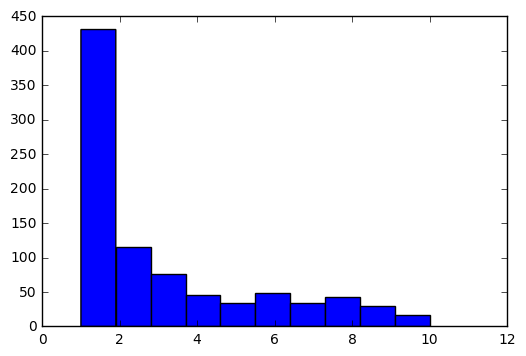

In [3]:
print(ytrain_s.shape)
plt.hist(ytrain_s)
plt.show()

In [8]:
pca = PCA(n_components=150)
pca.fit(xtrain)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[ 0.26767561  0.10108132  0.05535462  0.03709311  0.02764223  0.02407885
  0.02210637  0.01923751  0.0156229   0.01447509  0.01404237  0.01286937
  0.01230834  0.01155891  0.0112914   0.01096147  0.00951143  0.00912947
  0.00810794  0.00790278  0.00779463  0.00749943  0.00713407  0.00701131
  0.00670124  0.00642531  0.00624407  0.00598225  0.00574658  0.00533559
  0.00528253  0.00509119  0.00493942  0.00475086  0.0046262   0.00449441
  0.00431609  0.00415824  0.00405691  0.00396775  0.00393958  0.00387189
  0.00379011  0.0036019   0.00352305  0.003469    0.00341637  0.00336463
  0.00320764  0.00314917  0.00310117  0.00303395  0.0029901   0.00295037
  0.00287888  0.00282584  0.00275081  0.00270954  0.00268073  0.00263793
  0.00256872  0.00254329  0.00247449  0.00244189  0.00243088  0.00239652
  0.00235614  0.00229909  0.00227081  0.00224381  0.00217023  0.0021679
  0.00213189  0.00209498  0.00207716  0.00205837  0.00198741  0.00195841
  0.00193543  0.00190712  0.00189577  0.00186217  0.

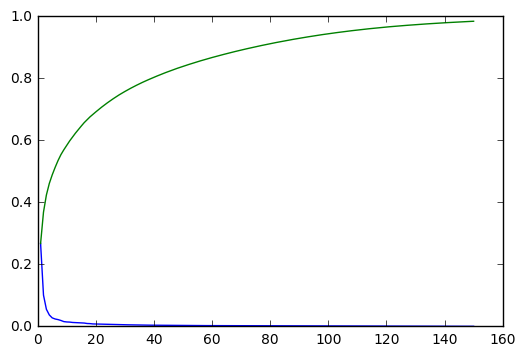

In [10]:
x = np.arange(1,151,1)
plt.plot(x, pca.explained_variance_ratio_)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [11]:
C_ = 2.9
clf = svm.SVC(decision_function_shape='ovo', random_state=42, C=C_)
xtrain_pca = pca.transform(xtrain)
fit = clf.fit(xtrain_pca, ytrain)
print(fit.score(xtrain_pca, ytrain))

0.983039193216


In [12]:
xtest_pca = pca.transform(xtest)
ypred = fit.predict(xtest_pca)
subm = pd.DataFrame(ypred, columns=['Sample_label'])
subm.index += 1
subm = subm.astype(int)
subm.to_csv('Solutions/svm_C2dot9_pca150_2111.csv',
            index_label='Sample_id')